# Goal:
PREDICTING  USER  INTEREST  FOR  PROFILING  AND  SEGMENTATION


# Objectives:
Data Collection: Obtain a relevant dataset for user profiling and segmentation.
Data Cleaning: Handle missing values and ensure data consistency.
Exploratory Data Analysis (EDA): Understand the data distributions, visualize relationships, and identify key patterns.
Feature Engineering: Create and modify features that can improve model performance.
Model Selection: Choose appropriate algorithms for clustering and segmentation (e.g., K-means, hierarchical clustering).
Model Training: Train the selected models on the dataset.
Model Evaluation: Evaluate the performance using relevant metrics like silhouette score and inertia.
Segmentation Analysis: Analyze the results and profile the identified user segments.
Visualization: Create visual representations of the clusters and insights gained from the segmentation.
Documentation: Document the entire process and findings for reporting and portfolio purposes.

In [1]:
import pandas as pd

In [2]:
cust = pd.read_csv("test.csv")
cust

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [3]:
cust.head(40)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
5,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4
6,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6
7,459008,Female,Yes,47,Yes,Artist,1.0,Average,3.0,Cat_6
8,459013,Male,Yes,50,Yes,Artist,2.0,Average,4.0,Cat_6
9,459014,Male,No,19,No,Healthcare,0.0,Low,4.0,Cat_6


In [4]:
cust.describe()

,ID,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2358.000000,2514.000000
mean,463433.918919,43.649791,2.552587,2.825378
std,2618.245698,16.967015,3.341094,1.551906
min,458989.000000,18.000000,0.000000,1.000000
25%,461162.500000,30.000000,0.000000,2.000000
50%,463379.000000,41.000000,1.000000,2.000000
75%,465696.000000,53.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


In [5]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [6]:
cust.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

# Exploratory data analysis

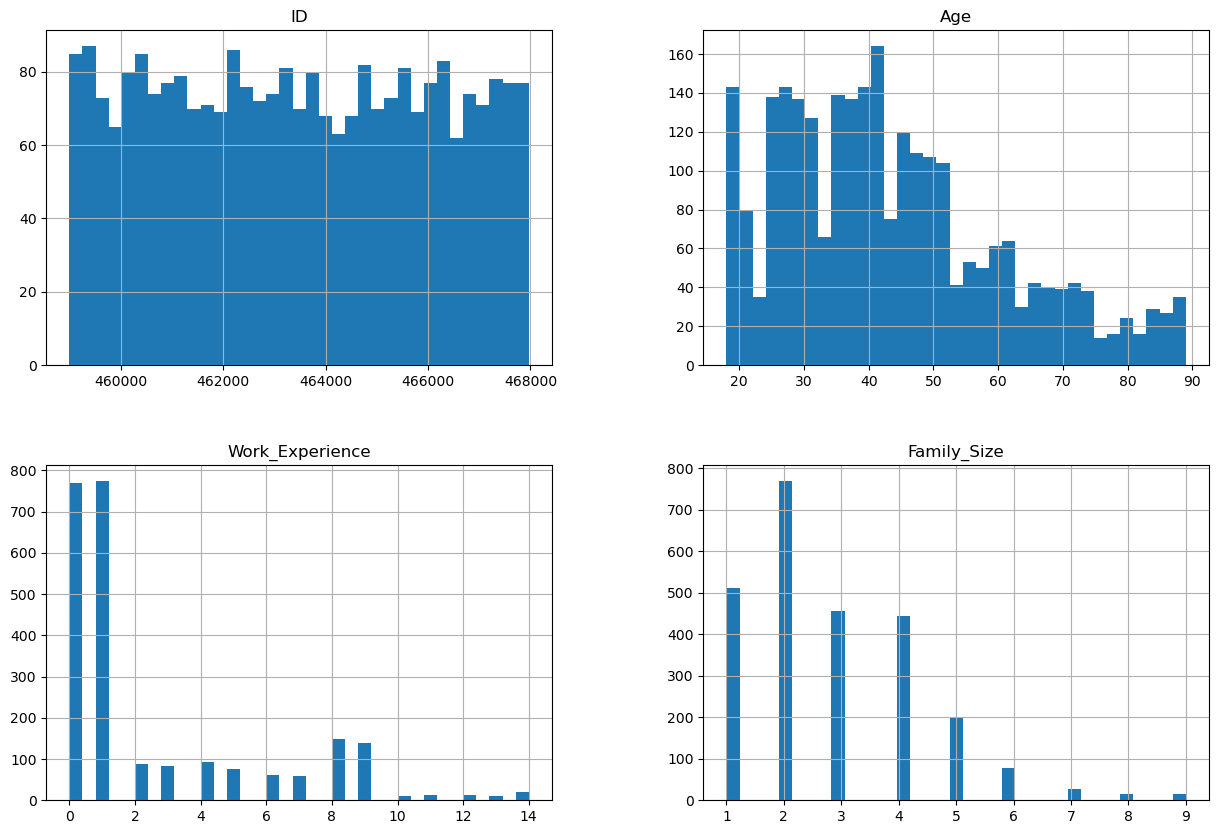

In [7]:
import matplotlib.pyplot as plt
cust.hist(bins=35, figsize=(15,10))
plt.show()

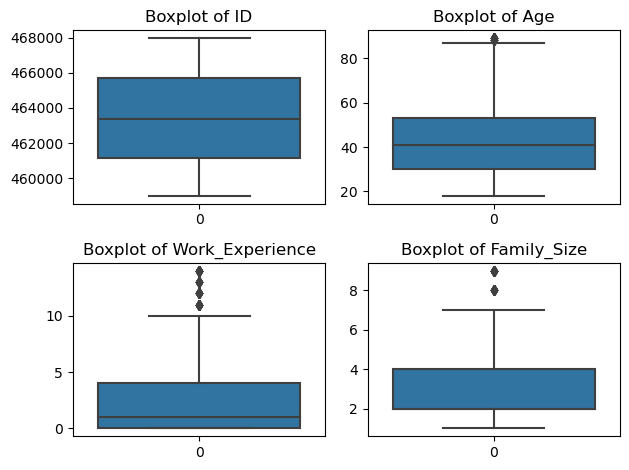

In [8]:
# boxplot to detect outliers
import seaborn as sns
numerical_columns = ['ID','Age','Work_Experience','Family_Size', ]
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2,2,i) #2 by 2 grid 
    sns.boxplot(cust[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [9]:
# IQR (Interquartile Range):
#Use the IQR method to detect outliers. Points outside the range of 1.5 times the IQR from the quartiles are considered outliers.
Q1 = cust[numerical_columns].quantile(0.25)
Q3 = cust[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = (cust[numerical_columns] < (Q1 - 1.5 * IQR)) | (cust[numerical_columns] > (Q1 + 1.5 * IQR))
print(f'Number of outliers:\n{outliers.sum()}')

Number of outliers:
ID                   1
Age                362
Work_Experience    417
Family_Size        135
dtype: int64


In [10]:
#handling outliers
#removing outlliers based on IQR
cust_cleaned = cust[~outliers.any(axis=1)]
#checking the shape of cleaned dataset
print(f"shape of dataset after removing outliers: {cust_cleaned.shape}")

shape of dataset after removing outliers: (1753, 10)


In [11]:
# IQR (Interquartile Range) calculation
Q1 = cust[numerical_columns].quantile(0.25)
Q3 = cust[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Detecting outliers
outliers = (cust[numerical_columns] < (Q1 - 1.5 * IQR)) | (cust[numerical_columns] > (Q3 + 1.5 * IQR))

# Removing outliers: Keep only the rows that are NOT outliers
cust_cleaned = cust[~outliers.any(axis=1)]

# Checking the result after removing outliers
print(f'Number of rows before removing outliers: {cust.shape[0]}')
print(f'Number of rows after removing outliers: {cust_cleaned.shape[0]}')


Number of rows before removing outliers: 2627
Number of rows after removing outliers: 2520


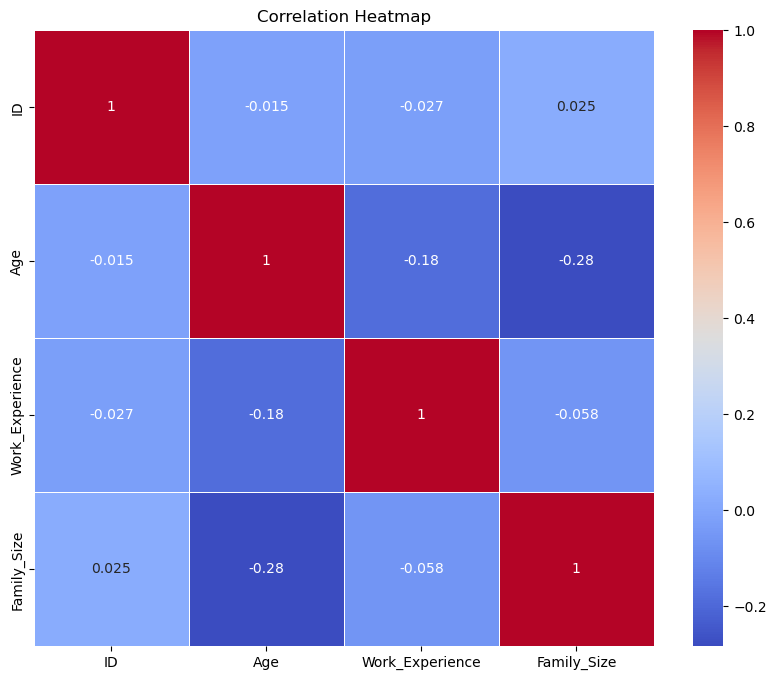

In [12]:
#correlation and heatmap
# Use numeric_only=True to suppress the warning and ensure correlation is calculated only for numerical columns
corr_matrix = cust_cleaned.corr(numeric_only=True)

# Create the heatmap using the corrected correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


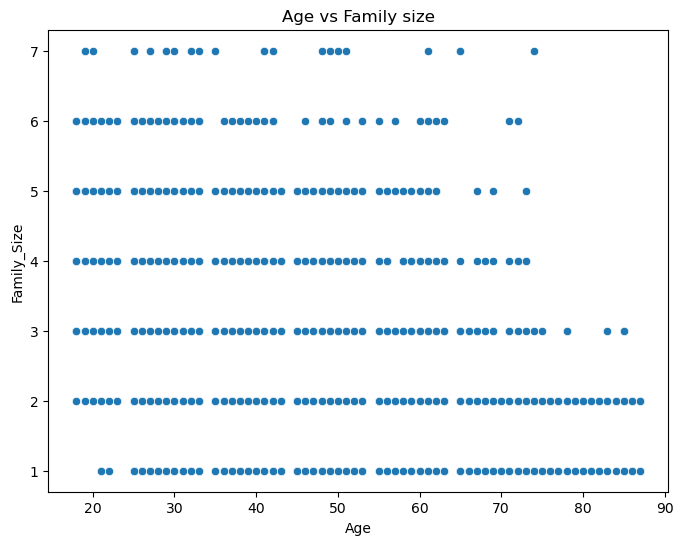

In [13]:
#scatterplot to visualize the relationship between age and family size
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Family_Size', data=cust_cleaned)
plt.title('Age vs Family size')
plt.show()

In [14]:
#check for missing values
missing_values = cust_cleaned.isnull().sum()
print("Missing values in each column :")
print(missing_values[missing_values > 0])

Missing values in each column :
Ever_Married        49
Graduated           24
Profession          37
Work_Experience    265
Family_Size        108
Var_1               30
dtype: int64


In [15]:
#categorical
#for ever married
cust_cleaned['Ever_Married'].fillna(cust_cleaned['Ever_Married'].mode()[0])

0       Yes
1       Yes
2       Yes
4        No
5       Yes
       ... 
2622     No
2623     No
2624     No
2625    Yes
2626     No
Name: Ever_Married, Length: 2520, dtype: object

In [16]:
cust_cleaned['Graduated'].fillna(cust_cleaned['Graduated'].mode()[0])


0       Yes
1       Yes
2        No
4        No
5       Yes
       ... 
2622     No
2623    Yes
2624    Yes
2625    Yes
2626    Yes
Name: Graduated, Length: 2520, dtype: object

In [17]:
#profession
cust_cleaned['Profession'].fillna(cust_cleaned['Profession'].mode()[0])


0            Engineer
1          Healthcare
2              Artist
4           Marketing
5              Doctor
            ...      
2622       Healthcare
2623           Doctor
2624    Entertainment
2625        Executive
2626       Healthcare
Name: Profession, Length: 2520, dtype: object

In [18]:
#work experience
cust_cleaned['Work_Experience'].fillna(cust_cleaned['Work_Experience'].median())


0       0.0
1       8.0
2       0.0
4       1.0
5       0.0
       ... 
2622    9.0
2623    1.0
2624    1.0
2625    1.0
2626    9.0
Name: Work_Experience, Length: 2520, dtype: float64

In [19]:
#family size
cust_cleaned['Family_Size'].fillna(cust_cleaned['Family_Size'].median())


0       1.0
1       4.0
2       1.0
4       4.0
5       5.0
       ... 
2622    4.0
2623    1.0
2624    2.0
2625    5.0
2626    3.0
Name: Family_Size, Length: 2520, dtype: float64

In [20]:
#var_1
cust_cleaned['Var_1'].fillna(cust_cleaned['Var_1'].mode()[0])


0       Cat_6
1       Cat_6
2       Cat_6
4       Cat_6
5       Cat_4
        ...  
2622    Cat_6
2623    Cat_6
2624    Cat_6
2625    Cat_4
2626    Cat_7
Name: Var_1, Length: 2520, dtype: object

In [21]:
print(cust_cleaned.isnull().sum())


ID                   0
Gender               0
Ever_Married        49
Age                  0
Graduated           24
Profession          37
Work_Experience    265
Spending_Score       0
Family_Size        108
Var_1               30
dtype: int64


In [22]:
# Make a copy of the DataFrame to avoid SettingWithCopyWarning
cust_cleaned = cust_cleaned.copy()

# Fill categorical columns with mode
cust_cleaned['Profession'] = cust_cleaned['Profession'].fillna(cust_cleaned['Profession'].mode()[0])
cust_cleaned['Var_1'] = cust_cleaned['Var_1'].fillna(cust_cleaned['Var_1'].mode()[0])
cust_cleaned['Ever_Married'] = cust_cleaned['Ever_Married'].fillna(cust_cleaned['Ever_Married'].mode()[0])
cust_cleaned['Graduated'] = cust_cleaned['Graduated'].fillna(cust_cleaned['Graduated'].mode()[0])

# Fill numerical columns with median
cust_cleaned['Work_Experience'] = cust_cleaned['Work_Experience'].fillna(cust_cleaned['Work_Experience'].median())
cust_cleaned['Family_Size'] = cust_cleaned['Family_Size'].fillna(cust_cleaned['Family_Size'].median())

# Verify if missing values have been handled
missing_values_after = cust_cleaned.isnull().sum()
print(missing_values_after)


ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64


In [23]:
# Check unique categories in the 'Profession' column
unique_Spending_Score = cust['Spending_Score'].unique()
num_unique_Spending_Score = cust['Spending_Score'].nunique()

print("Unique categories in Spending Score column:", unique_Spending_Score)
print("Number of unique categories in Spending_Score column:", num_unique_Spending_Score)


Unique categories in Spending Score column: ['Low' 'Average' 'High']
Number of unique categories in Spending_Score column: 3


In [24]:
print(cust.head())
print("Columns in the dataset:", cust.columns)

       ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0  458989  Female          Yes   36       Yes    Engineer              0.0   
1  458994    Male          Yes   37       Yes  Healthcare              8.0   
2  458996  Female          Yes   69        No         NaN              0.0   
3  459000    Male          Yes   59        No   Executive             11.0   
4  459001  Female           No   19        No   Marketing              NaN   

  Spending_Score  Family_Size  Var_1  
0            Low          1.0  Cat_6  
1        Average          4.0  Cat_6  
2            Low          1.0  Cat_6  
3           High          2.0  Cat_6  
4            Low          4.0  Cat_6  
Columns in the dataset: Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1'],
      dtype='object')


In [25]:
#create age group feature
cust['Age_Group'] = pd.cut(cust['Age'], bins=[0,25,35,45,55,65,100], labels=['18-25','26-35', '36-45','46-55','56-65','66+'])
print(cust[['Age', 'Age_Group']].head())

   Age Age_Group
0   36     36-45
1   37     36-45
2   69       66+
3   59     56-65
4   19     18-25


In [26]:
print(cust['Work_Experience'].dtype)


float64


In [27]:
# Create Family_Size_Category feature
cust['Family_Size_Category'] = pd.cut(cust['Family_Size'], bins=[0, 1, 3, 5, 10], labels=['Small', 'Medium', 'Large', 'Very Large'])

# Check if the feature was added correctly
print(cust[['Family_Size', 'Family_Size_Category']].head())


   Family_Size Family_Size_Category
0          1.0                Small
1          4.0                Large
2          1.0                Small
3          2.0               Medium
4          4.0                Large


In [28]:
# Create Marital_Profession feature
cust['Marital_Profession'] = cust['Ever_Married'].fillna('No') + '_' + cust['Profession'].fillna('Unknown')

# Check if the feature was added correctly
print(cust[['Ever_Married', 'Profession', 'Marital_Profession']].head())


  Ever_Married  Profession Marital_Profession
0          Yes    Engineer       Yes_Engineer
1          Yes  Healthcare     Yes_Healthcare
2          Yes         NaN        Yes_Unknown
3          Yes   Executive      Yes_Executive
4           No   Marketing       No_Marketing


In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#select numerical column for normalization
numerical_columns = ['Age', 'Work_Experience', 'Family_Size']
cust[numerical_columns] = scaler.fit_transform(cust[numerical_columns])
print(cust[numerical_columns].head())

        Age  Work_Experience  Family_Size
0  0.253521         0.000000        0.000
1  0.267606         0.571429        0.375
2  0.718310         0.000000        0.000
3  0.577465         0.785714        0.125
4  0.014085              NaN        0.375


In [30]:

# Perform one-hot encoding
categorical_columns = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
cust_encoded = pd.get_dummies(cust, columns=categorical_columns)

# Check the result
print(cust_encoded.head())


       ID       Age  Work_Experience  Family_Size Age_Group  \
0  458989  0.253521         0.000000        0.000     36-45   
1  458994  0.267606         0.571429        0.375     36-45   
2  458996  0.718310         0.000000        0.000       66+   
3  459000  0.577465         0.785714        0.125     56-65   
4  459001  0.014085              NaN        0.375     18-25   

  Family_Size_Category Marital_Profession  Gender_Female  Gender_Male  \
0                Small       Yes_Engineer              1            0   
1                Large     Yes_Healthcare              0            1   
2                Small        Yes_Unknown              1            0   
3               Medium      Yes_Executive              0            1   
4                Large       No_Marketing              1            0   

   Ever_Married_No  ...  Spending_Score_Average  Spending_Score_High  \
0                0  ...                       0                    0   
1                0  ...               

In [31]:
print(cust_encoded.isnull().sum())


ID                            0
Age                           0
Work_Experience             269
Family_Size                 113
Age_Group                     0
Family_Size_Category        113
Marital_Profession            0
Gender_Female                 0
Gender_Male                   0
Ever_Married_No               0
Ever_Married_Yes              0
Graduated_No                  0
Graduated_Yes                 0
Profession_Artist             0
Profession_Doctor             0
Profession_Engineer           0
Profession_Entertainment      0
Profession_Executive          0
Profession_Healthcare         0
Profession_Homemaker          0
Profession_Lawyer             0
Profession_Marketing          0
Spending_Score_Average        0
Spending_Score_High           0
Spending_Score_Low            0
Var_1_Cat_1                   0
Var_1_Cat_2                   0
Var_1_Cat_3                   0
Var_1_Cat_4                   0
Var_1_Cat_5                   0
Var_1_Cat_6                   0
Var_1_Ca

In [32]:
# Fill missing values in Work_Experience with the median
cust_encoded['Work_Experience'] = cust_encoded['Work_Experience'].fillna(cust_encoded['Work_Experience'].median())

# Fill missing values in Family_Size with the median
cust_encoded['Family_Size'] = cust_encoded['Family_Size'].fillna(cust_encoded['Family_Size'].median())
print(cust_encoded.isnull().sum())


ID                            0
Age                           0
Work_Experience               0
Family_Size                   0
Age_Group                     0
Family_Size_Category        113
Marital_Profession            0
Gender_Female                 0
Gender_Male                   0
Ever_Married_No               0
Ever_Married_Yes              0
Graduated_No                  0
Graduated_Yes                 0
Profession_Artist             0
Profession_Doctor             0
Profession_Engineer           0
Profession_Entertainment      0
Profession_Executive          0
Profession_Healthcare         0
Profession_Homemaker          0
Profession_Lawyer             0
Profession_Marketing          0
Spending_Score_Average        0
Spending_Score_High           0
Spending_Score_Low            0
Var_1_Cat_1                   0
Var_1_Cat_2                   0
Var_1_Cat_3                   0
Var_1_Cat_4                   0
Var_1_Cat_5                   0
Var_1_Cat_6                   0
Var_1_Ca

In [61]:
# Fill missing values in Family_Size_Category with the most frequent value (mode)
cust_encoded['Family_Size_Category'] = cust_encoded['Family_Size_Category'].fillna(cust_encoded['Family_Size_Category'].mode()[0])

# Verify that there are no more missing values
print(cust_encoded.isnull().sum())


ID                          0
Age                         0
Work_Experience             0
Family_Size                 0
Age_Group                   0
Family_Size_Category        0
Marital_Profession          0
Gender_Female               0
Gender_Male                 0
Ever_Married_No             0
Ever_Married_Yes            0
Graduated_No                0
Graduated_Yes               0
Profession_Artist           0
Profession_Doctor           0
Profession_Engineer         0
Profession_Entertainment    0
Profession_Executive        0
Profession_Healthcare       0
Profession_Homemaker        0
Profession_Lawyer           0
Profession_Marketing        0
Spending_Score_Average      0
Spending_Score_High         0
Spending_Score_Low          0
Var_1_Cat_1                 0
Var_1_Cat_2                 0
Var_1_Cat_3                 0
Var_1_Cat_4                 0
Var_1_Cat_5                 0
Var_1_Cat_6                 0
Var_1_Cat_7                 0
cluster                     0
dbscan_clu

In [33]:
print(cust[numerical_columns].isnull().sum())


Age                  0
Work_Experience    269
Family_Size        113
dtype: int64


In [34]:
cust[numerical_columns] = cust[numerical_columns].fillna(cust[numerical_columns].median())


In [35]:
# Fill missing values in Work_Experience and Family_Size
cust_encoded['Work_Experience'] = cust_encoded['Work_Experience'].fillna(cust_encoded['Work_Experience'].median())
cust_encoded['Family_Size'] = cust_encoded['Family_Size'].fillna(cust_encoded['Family_Size'].median())

# Check for any missing values
print(cust_encoded[numerical_columns].isnull().sum())


Age                0
Work_Experience    0
Family_Size        0
dtype: int64


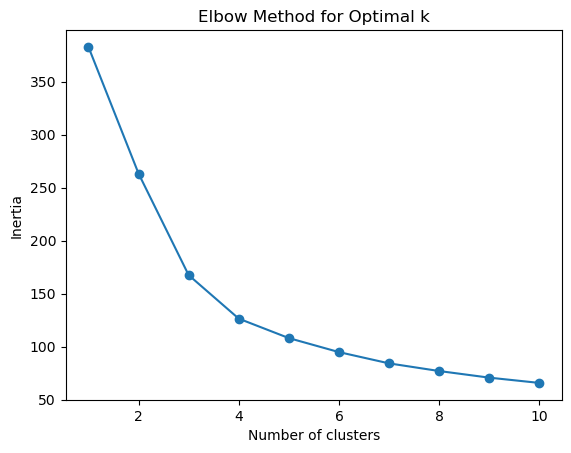

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Explicitly set n_init=10
    kmeans.fit(cust_encoded[numerical_columns])  # Use the scaled data
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


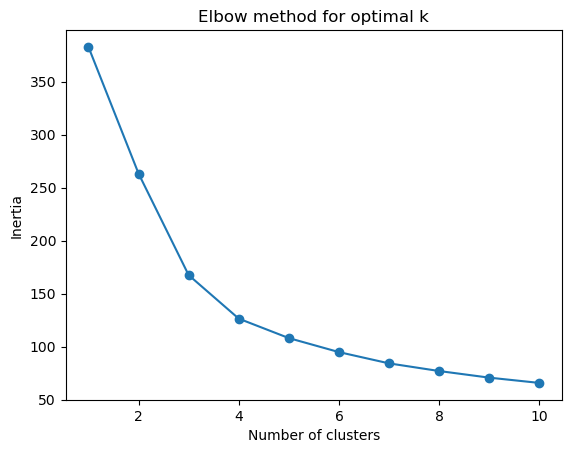

In [37]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state = 42, n_init = 10)
    kmeans.fit(cust_encoded[numerical_columns])
    inertia.append(kmeans.inertia_)
#plotting the elbow graph
plt.plot(range(1,11), inertia, marker ='o')
plt.title('Elbow method for optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

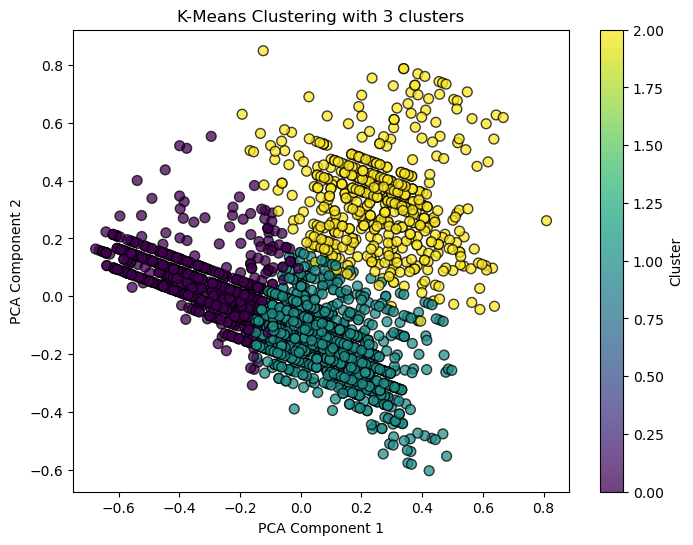

In [38]:
import numpy as np
from sklearn.decomposition import PCA

# Apply KMeans with the chosen number of clusters (for example, k = 3)
optimal_k = 3  # Adjust this based on the elbow plot result
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cust_encoded['cluster'] = kmeans.fit_predict(cust_encoded[numerical_columns])

# Visualizing using PCA to reduce dimensions (optional but helps in visualizing)
pca = PCA(n_components=2)  # Reducing to 2D for visualization
pca_components = pca.fit_transform(cust_encoded[numerical_columns])

# Scatter plot with color-coded clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=cust_encoded['cluster'], cmap='viridis', marker='o', s=50, edgecolor='k', alpha=0.75)
plt.title(f'K-Means Clustering with {optimal_k} clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [39]:
#trying dbscan
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(cust_encoded[numerical_columns])
cust_encoded['dbscan_cluster'] = dbscan.labels_
print(cust_encoded['dbscan_cluster'].value_counts())

 0    2621
-1       6
Name: dbscan_cluster, dtype: int64


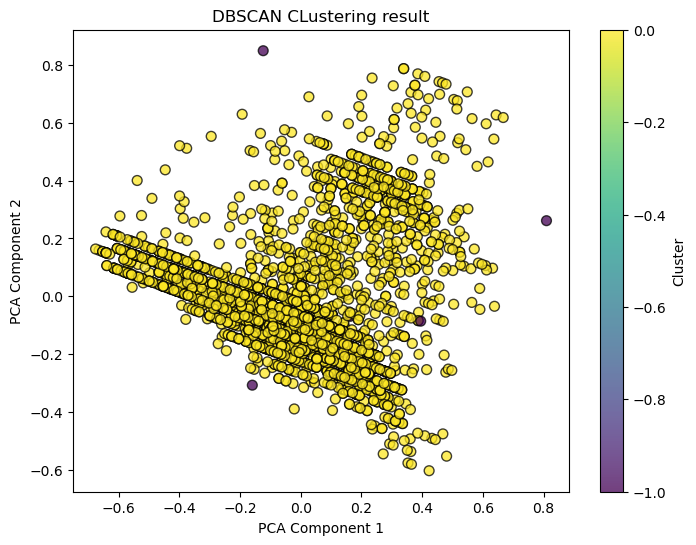

In [40]:
#visualization
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_components = pca.fit_transform(cust_encoded[numerical_columns])
#scatter plot
plt.figure(figsize=(8,6))
plt.scatter(pca_components[:,0], pca_components[:,1], c=cust_encoded['dbscan_cluster'], cmap='viridis', marker='o', s=50, edgecolor='k', alpha=0.75)
plt.title(f'DBSCAN CLustering result')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

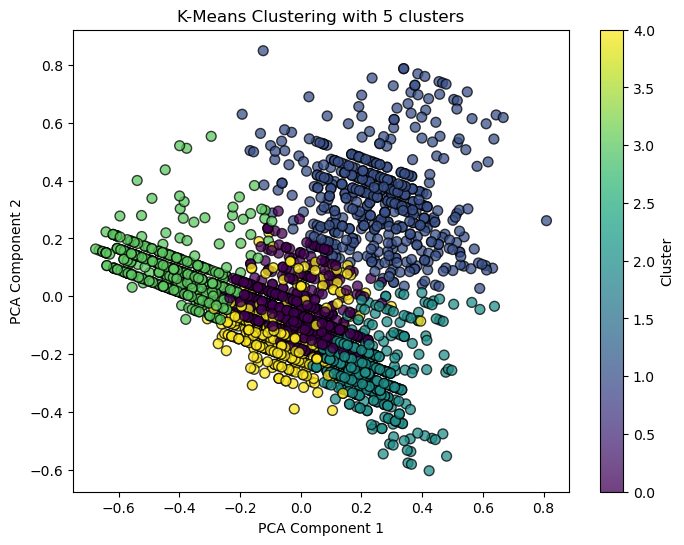

In [41]:
#fine tune k parameters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#try different n cluster value
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cust_encoded['cluster'] = kmeans.fit_predict(cust_encoded[numerical_columns])

# Visualizing using PCA to reduce dimensions (optional but helps in visualizing)
pca = PCA(n_components=2)  # Reducing to 2D for visualization
pca_components = pca.fit_transform(cust_encoded[numerical_columns])

# Scatter plot with color-coded clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=cust_encoded['cluster'], cmap='viridis', marker='o', s=50, edgecolor='k', alpha=0.75)
plt.title(f'K-Means Clustering with {optimal_k} clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [42]:
#evaluate the clusters using silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(cust_encoded[numerical_columns], cust_encoded['cluster'])
print(f"Silhouette Score for {5} clusters: {silhouette_avg}")

Silhouette Score for 5 clusters: 0.37222281565879084


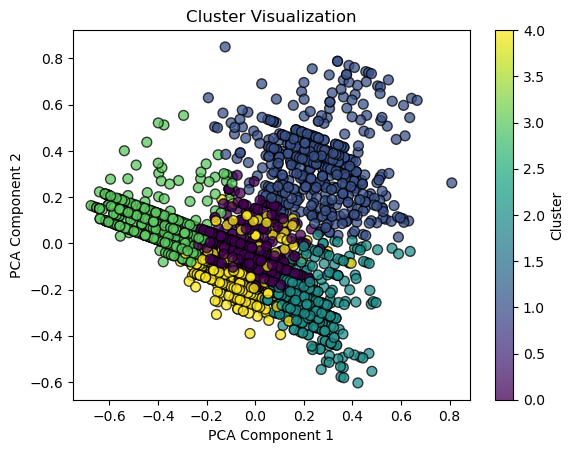

In [43]:
#analyze clusters
import matplotlib.pyplot as plt
plt.scatter(pca_components[:,0], pca_components[:,1], c=cust_encoded['cluster'],cmap='viridis',marker='o',s=50, edgecolor='k', alpha=0.75)
plt.title(f'Cluster Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()
            

In [44]:
#summarize the mean values for each feature by cluster 
cluster_summary = cust_encoded.groupby('cluster').mean(numeric_only=True)
print(cluster_summary)

                    ID       Age  Work_Experience  Family_Size  Gender_Female  \
cluster                                                                         
0        463369.598394  0.287573         0.070759     0.099900       0.496653   
1        463334.186373  0.269581         0.593902     0.181363       0.527054   
2        463588.410678  0.110044         0.076415     0.427875       0.412731   
3        463320.697154  0.741297         0.061411     0.110264       0.424797   
4        463628.649254  0.451230         0.080846     0.398010       0.395522   

         Gender_Male  Ever_Married_No  Ever_Married_Yes  Graduated_No  \
cluster                                                                 
0           0.503347         0.457831          0.526104      0.285141   
1           0.472946         0.511022          0.468938      0.320641   
2           0.587269         0.833676          0.143737      0.714579   
3           0.575203         0.056911          0.922764      0.3252

In [45]:
print(cust_encoded.columns)


Index(['ID', 'Age', 'Work_Experience', 'Family_Size', 'Age_Group',
       'Family_Size_Category', 'Marital_Profession', 'Gender_Female',
       'Gender_Male', 'Ever_Married_No', 'Ever_Married_Yes', 'Graduated_No',
       'Graduated_Yes', 'Profession_Artist', 'Profession_Doctor',
       'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Spending_Score_Average',
       'Spending_Score_High', 'Spending_Score_Low', 'Var_1_Cat_1',
       'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4', 'Var_1_Cat_5',
       'Var_1_Cat_6', 'Var_1_Cat_7', 'cluster', 'dbscan_cluster'],
      dtype='object')


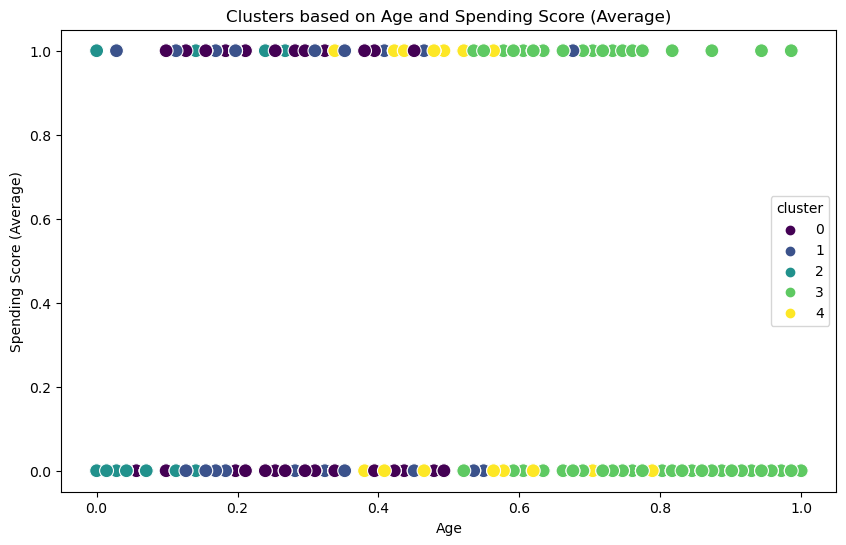

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cust_encoded, x='Age', y='Spending_Score_Average', hue='cluster', palette='viridis', s=100)
plt.title('Clusters based on Age and Spending Score (Average)')
plt.xlabel('Age')
plt.ylabel('Spending Score (Average)')
plt.show()


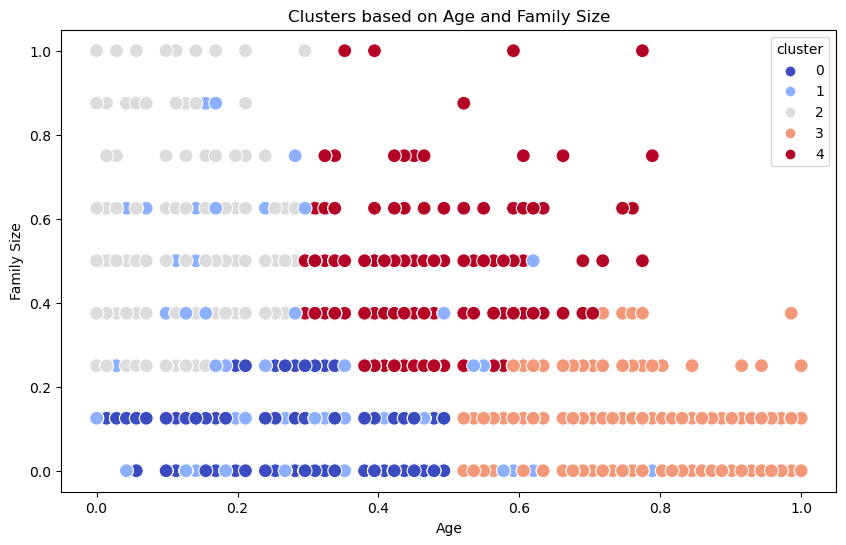

In [47]:
# Visualize Age vs. Family Size with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cust_encoded, x='Age', y='Family_Size', hue='cluster', palette='coolwarm', s=100)
plt.title('Clusters based on Age and Family Size')
plt.xlabel('Age')
plt.ylabel('Family Size')
plt.show()


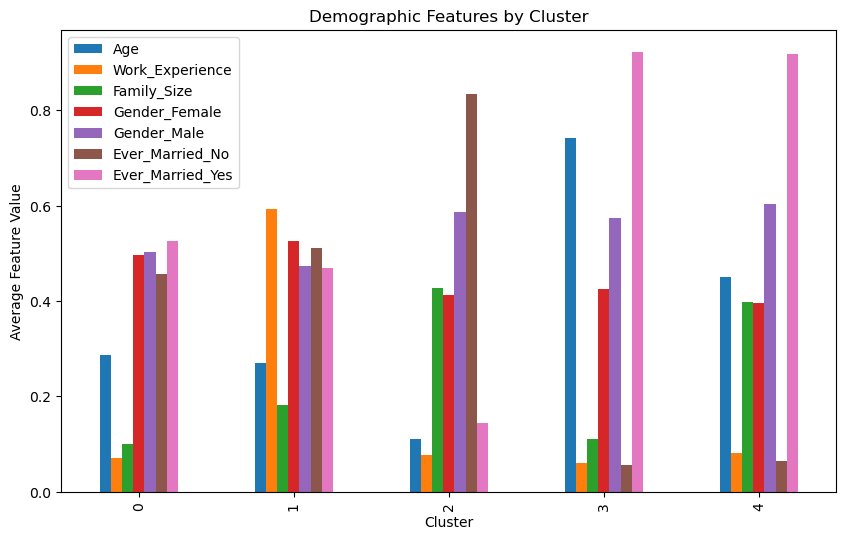

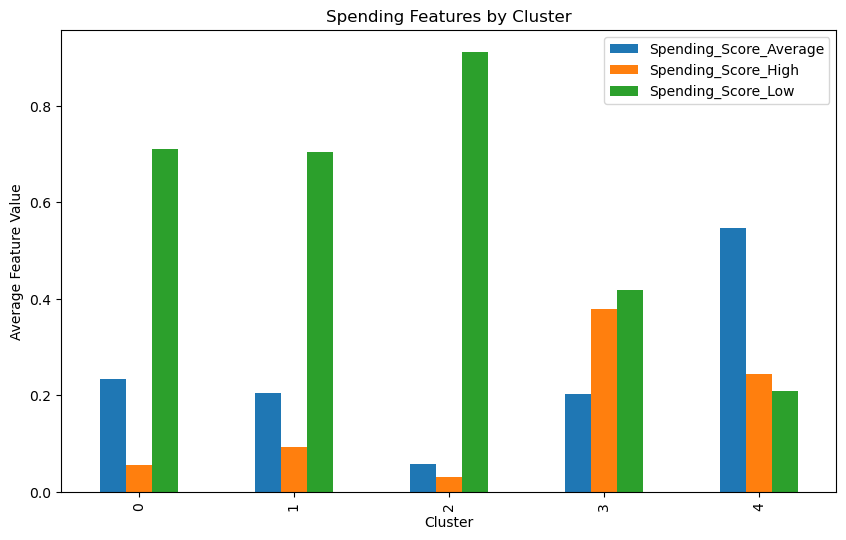

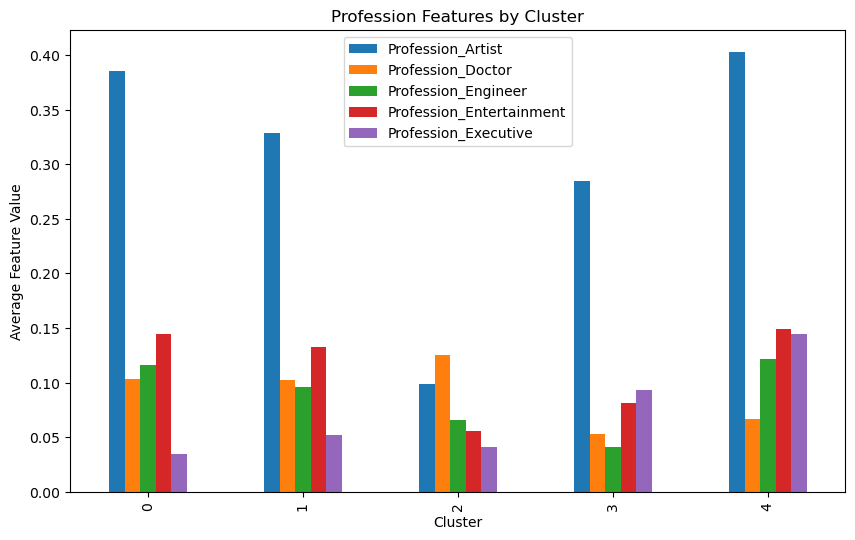

In [49]:
# Grouping features into different categories
demographic_features = ['Age', 'Work_Experience', 'Family_Size', 'Gender_Female', 'Gender_Male', 'Ever_Married_No', 'Ever_Married_Yes']
spending_features = ['Spending_Score_Average', 'Spending_Score_High', 'Spending_Score_Low']
profession_features = ['Profession_Artist', 'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment', 'Profession_Executive']

# Plot demographic features
cluster_summary[demographic_features].plot(kind='bar', figsize=(10, 6))
plt.title("Demographic Features by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Feature Value")
plt.show()

# Plot spending features
cluster_summary[spending_features].plot(kind='bar', figsize=(10, 6))
plt.title("Spending Features by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Feature Value")
plt.show()

# Plot profession features
cluster_summary[profession_features].plot(kind='bar', figsize=(10, 6))
plt.title("Profession Features by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Feature Value")
plt.show()


In [50]:
#Analyze the Features for Cluster 1

#extract features vallues for cluster 1
cluster_1_profile = cluster_summary.loc[1]
#display profile for cluster 1
print(cluster_1_profile)

Age                         0.269581
Work_Experience             0.593902
Family_Size                 0.181363
Gender_Female               0.527054
Gender_Male                 0.472946
Ever_Married_No             0.511022
Ever_Married_Yes            0.468938
Graduated_No                0.320641
Graduated_Yes               0.665331
Profession_Artist           0.328657
Profession_Doctor           0.102204
Profession_Engineer         0.096192
Profession_Entertainment    0.132265
Profession_Executive        0.052104
Profession_Healthcare       0.148297
Profession_Homemaker        0.082164
Profession_Lawyer           0.014028
Profession_Marketing        0.040080
Spending_Score_Average      0.204409
Spending_Score_High         0.092184
Spending_Score_Low          0.703407
Var_1_Cat_1                 0.012024
Var_1_Cat_2                 0.054108
Var_1_Cat_3                 0.098196
Var_1_Cat_4                 0.116232
Var_1_Cat_5                 0.012024
Var_1_Cat_6                 0.669339
V

# Unique Behavior:

- Spending Score: Low (0.703)
- Engagement: Moderate (based on family size and work experience)
- Demographics: Mix of genders, with a slight female dominance. Majority are young, unmarried professionals with average educational backgrounds.
- Profession: Predominantly artists and healthcare workers, with a notable number in entertainment.

Marketing/Engagement Strategy:

- Targeted Promotions: Offer discounts or low-cost subscription plans to attract more frequent purchases.
- Content Marketing: Create engaging content related to their professions (e.g., healthcare or arts) to capture their interest.
- In-App Engagement: Use notifications for time-sensitive offers or personalized recommendations to increase interaction

In [51]:
# Extract features for Cluster 2
cluster_2_profile = cluster_summary.loc[2]
print("Cluster 2 Profile:")
print(cluster_2_profile)

Cluster 2 Profile:
Age                         0.110044
Work_Experience             0.076415
Family_Size                 0.427875
Gender_Female               0.412731
Gender_Male                 0.587269
Ever_Married_No             0.833676
Ever_Married_Yes            0.143737
Graduated_No                0.714579
Graduated_Yes               0.277207
Profession_Artist           0.098563
Profession_Doctor           0.125257
Profession_Engineer         0.065708
Profession_Entertainment    0.055441
Profession_Executive        0.041068
Profession_Healthcare       0.513347
Profession_Homemaker        0.022587
Profession_Lawyer           0.002053
Profession_Marketing        0.069815
Spending_Score_Average      0.057495
Spending_Score_High         0.030801
Spending_Score_Low          0.911704
Var_1_Cat_1                 0.012320
Var_1_Cat_2                 0.110883
Var_1_Cat_3                 0.112936
Var_1_Cat_4                 0.209446
Var_1_Cat_5                 0.012320
Var_1_Cat_6        

# Unique Behavior:

- Spending Score: Very Low (0.911)
- Engagement: Low (spending and interactions are minimal)
- Demographics: Mostly unmarried males, younger age group with small families. Significant portion did not graduate, suggesting they may be entry-level workers.
- Profession: Dominated by healthcare workers, with some professionals in engineering and marketing.
 
 Marketing/Engagement Strategy:

- Re-Engagement Campaigns: Send personalized email campaigns or in-app messages to offer family-focused deals or discounts for bulk purchases.
- Loyalty Programs: Create family-oriented loyalty programs with rewards for consistent usage.
- Financial Incentives: Introduce installment plans or low-cost packages to fit their budget

In [52]:
# Extract features for Cluster 2
cluster_3_profile = cluster_summary.loc[3]
print("Cluster 3 Profile:")
print(cluster_3_profile)

Cluster 3 Profile:
Age                         0.741297
Work_Experience             0.061411
Family_Size                 0.110264
Gender_Female               0.424797
Gender_Male                 0.575203
Ever_Married_No             0.056911
Ever_Married_Yes            0.922764
Graduated_No                0.325203
Graduated_Yes               0.658537
Profession_Artist           0.284553
Profession_Doctor           0.052846
Profession_Engineer         0.040650
Profession_Entertainment    0.081301
Profession_Executive        0.093496
Profession_Healthcare       0.004065
Profession_Homemaker        0.008130
Profession_Lawyer           0.396341
Profession_Marketing        0.022358
Spending_Score_Average      0.203252
Spending_Score_High         0.378049
Spending_Score_Low          0.418699
Var_1_Cat_1                 0.004065
Var_1_Cat_2                 0.022358
Var_1_Cat_3                 0.065041
Var_1_Cat_4                 0.067073
Var_1_Cat_5                 0.004065
Var_1_Cat_6        

# Unique Behavior:

- Spending Score: High (0.378 High, 0.418 Low, showing a mix but overall higher spending tendency)
- Engagement: Very high compared to other clusters.
- Demographics: Mostly married, older professionals with more work experience, and a high percentage of graduates.
- Profession: Significant number of high-profile professions like lawyers, executives, and artists.

Marketing/Engagement Strategy:

- Services: Offer exclusive, premium services or higher-tier packages tailored to their needs.
- Experience-Based Marketing: Promote experiences over products, such as VIP access, exclusive events, or personalized recommendations.
- Upselling & Cross-Selling: Since they have a higher spending tendency, encourage them to try new products or upgrade services by offering complementary or premium options.

# Summarization of Clusters:

- Cluster 1: Young professionals, low spending.
- Cluster 2: Young families, low spending.
- Cluster 3: Older professionals, high spending.

# General Insights:
- Cluster 1: Focus on low-cost, engaging content and targeted offers.
- Cluster 2: Re-engage through financial incentives and family-oriented campaigns.
- Cluster 3: Maximize value by promoting exclusive experiences and premium services.

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


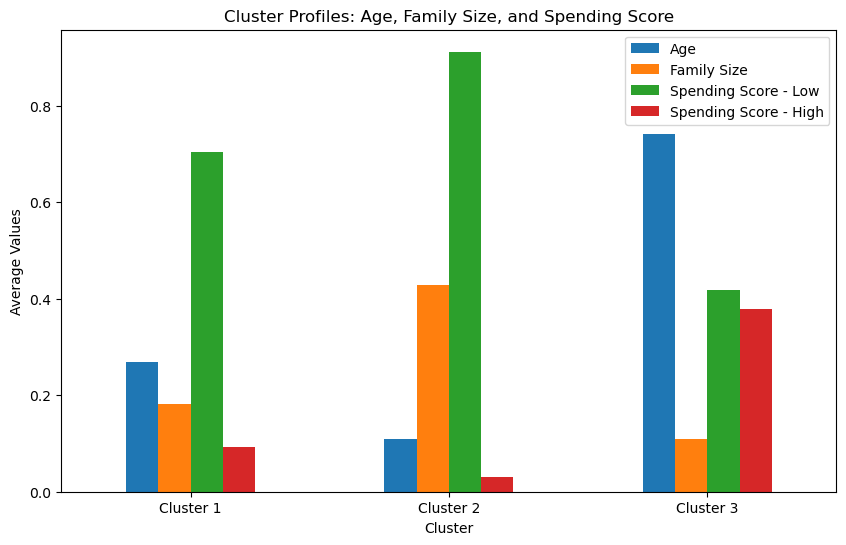

In [54]:
#bar charts for demographics and spending score
cluster_data = { 'Cluster': ['Cluster 1', 'Cluster 2', 'Cluster 3'],
    'Age': [0.269581, 0.110044, 0.741297],
    'Family Size': [0.181363, 0.427875, 0.110264],
    'Spending Score - Low': [0.703407, 0.911704, 0.418699],
    'Spending Score - High': [0.092184, 0.030801, 0.378049]
}
cust_encoded_clusters = pd.DataFrame(cluster_data)
# Plotting
cust_encoded_clusters.set_index('Cluster').plot(kind='bar', figsize=(10,6))
plt.title('Cluster Profiles: Age, Family Size, and Spending Score')
plt.ylabel('Average Values')
plt.xticks(rotation=0)
plt.show()

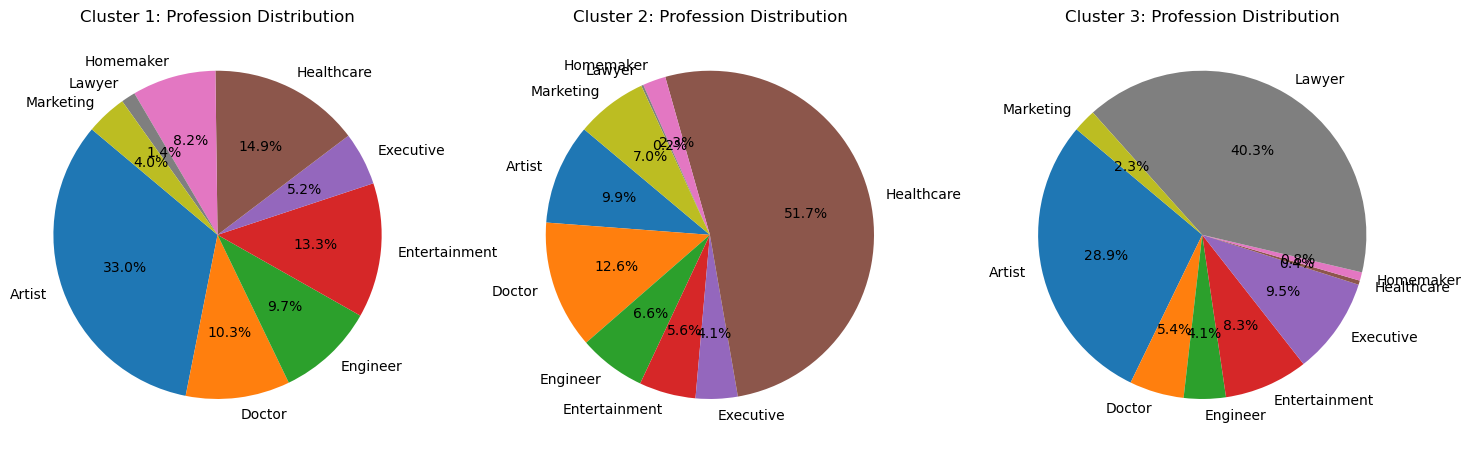

In [55]:
#pie-chart for profession distribution
# Data for each cluster's profession distribution
cluster_1_profession = {
    'Artist': 0.328657,
    'Doctor': 0.102204,
    'Engineer': 0.096192,
    'Entertainment': 0.132265,
    'Executive': 0.052104,
    'Healthcare': 0.148297,
    'Homemaker': 0.082164,
    'Lawyer': 0.014028,
    'Marketing': 0.040080
}

cluster_2_profession = {
    'Artist':   0.098563,
    'Doctor':   0.125257,
    'Engineer':  0.065708,
    'Entertainment': 0.055441,
    'Executive':  0.041068,
    'Healthcare': 0.513347,
    'Homemaker':  0.022587,
    'Lawyer':  0.002053,
    'Marketing':  0.069815
}

cluster_3_profession = {
    'Artist': 0.284553,
    'Doctor': 0.052846,
    'Engineer': 0.040650,
    'Entertainment': 0.081301,
    'Executive':  0.093496,
    'Healthcare': 0.004065,
    'Homemaker': 0.008130,
    'Lawyer':  0.396341,
    'Marketing': 0.022358
}

# Plotting all clusters together
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Cluster 1 Pie Chart
axs[0].pie(cluster_1_profession.values(), labels=cluster_1_profession.keys(), autopct='%1.1f%%', startangle=140)
axs[0].set_title('Cluster 1: Profession Distribution')

# Cluster 2 Pie Chart
axs[1].pie(cluster_2_profession.values(), labels=cluster_2_profession.keys(), autopct='%1.1f%%', startangle=140)
axs[1].set_title('Cluster 2: Profession Distribution')

# Cluster 3 Pie Chart
axs[2].pie(cluster_3_profession.values(), labels=cluster_3_profession.keys(), autopct='%1.1f%%', startangle=140)
axs[2].set_title('Cluster 3: Profession Distribution')

plt.show()


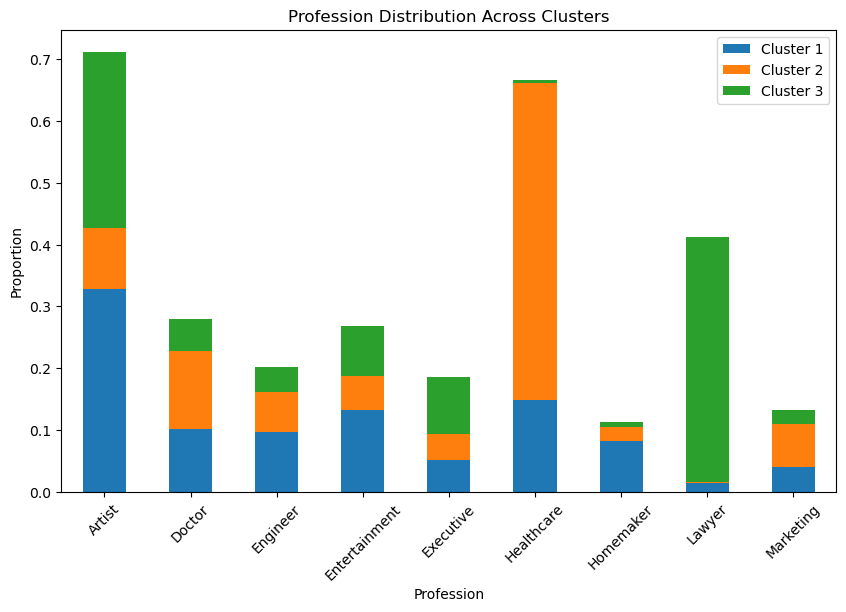

In [56]:
# Data for all clusters' profession distribution
professions = ['Artist', 'Doctor', 'Engineer', 'Entertainment', 'Executive', 'Healthcare', 'Homemaker', 'Lawyer', 'Marketing']
cluster_1_values = [0.328657, 0.102204, 0.096192, 0.132265, 0.052104, 0.148297, 0.082164, 0.014028, 0.040080]
cluster_2_values = [0.098563,  0.125257,0.065708, 0.055441,0.041068,  0.513347, 0.022587,  0.002053, 0.069815]
cluster_3_values = [0.284553, 0.052846, 0.040650, 0.081303, 0.093496, 0.004065, 0.008130, 0.396341, 0.022358]

# Creating a DataFrame for easy plotting

cust_encoded_profession = pd.DataFrame({
    'Profession': professions,
    'Cluster 1': cluster_1_values,
    'Cluster 2': cluster_2_values,
    'Cluster 3': cluster_3_values
})

# Plotting stacked bar chart
cust_encoded_profession.set_index('Profession').plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Profession Distribution Across Clusters')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()


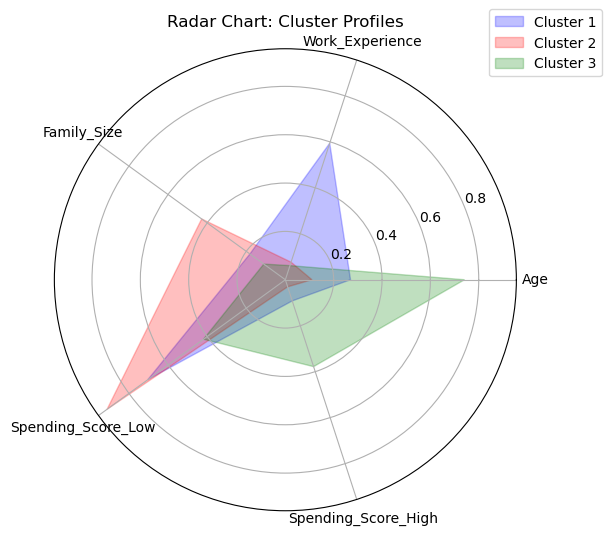

In [57]:
#radar chart
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Data for radar chart
labels = ['Age', 'Work_Experience', 'Family_Size', 'Spending_Score_Low', 'Spending_Score_High']

# Cluster 1, 2, and 3 data
cluster_1 = [0.269581, 0.593902, 0.181363, 0.703407, 0.092184]
cluster_2 = [0.110044, 0.076415, 0.427875, 0.911704, 0.030801]
cluster_3 = [0.741297, 0.061411, 0.110264, 0.418699, 0.378049]

# Number of variables
num_vars = len(labels)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Make the radar chart circular
cluster_1 += cluster_1[:1]
cluster_2 += cluster_2[:1]
cluster_3 += cluster_3[:1]

# Initialize the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot each cluster
ax.fill(angles, cluster_1, color='blue', alpha=0.25, label='Cluster 1')
ax.fill(angles, cluster_2, color='red', alpha=0.25, label='Cluster 2')
ax.fill(angles, cluster_3, color='green', alpha=0.25, label='Cluster 3')

# Add the labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Add a title and legend
plt.title('Radar Chart: Cluster Profiles')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

plt.show()


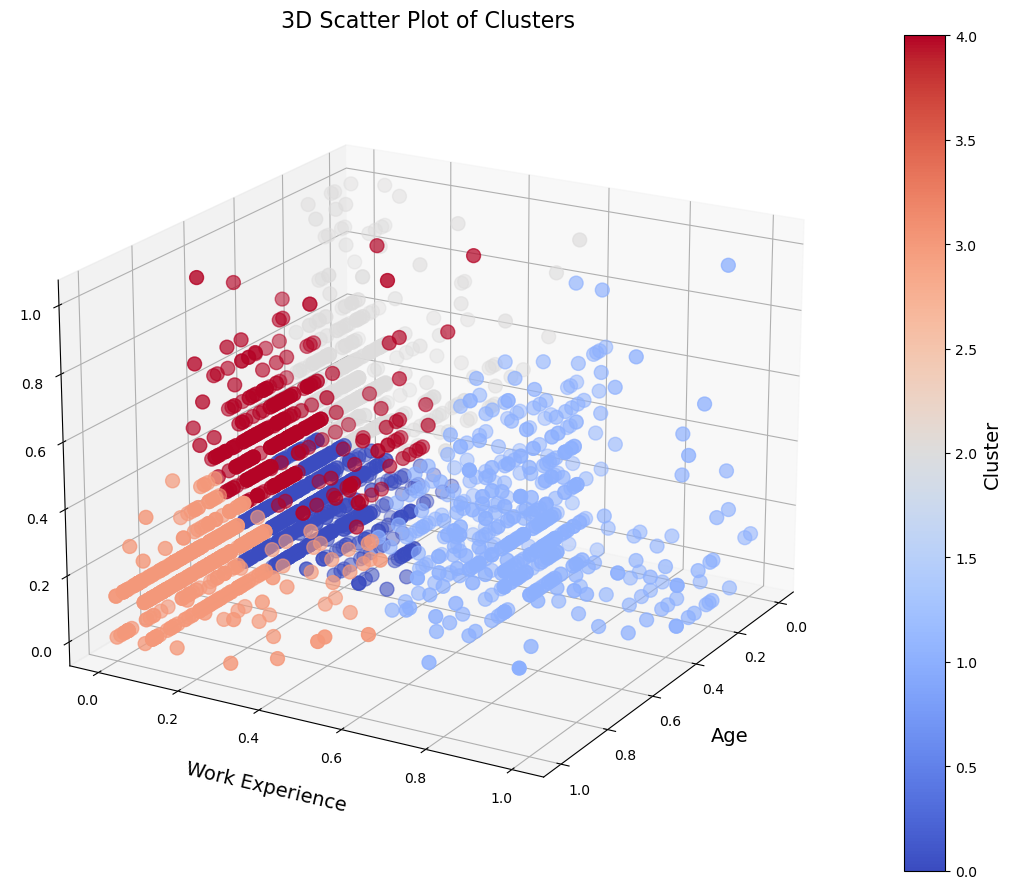

In [58]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 9))  # Increase figure size
ax = fig.add_subplot(111, projection='3d')

# Create 3D scatter plot
sc = ax.scatter(cust_encoded['Age'], cust_encoded['Work_Experience'], cust_encoded['Family_Size'], 
                c=cust_encoded['cluster'], cmap='coolwarm', s=100)

# Label and format adjustments
ax.set_xlabel('Age', fontsize=14, labelpad=15)
ax.set_ylabel('Work Experience', fontsize=14, labelpad=15)
ax.set_zlabel('Family Size', fontsize=14, labelpad=15)
plt.title('3D Scatter Plot of Clusters', fontsize=16)
ax.view_init(elev=20, azim=30)  # Adjust view angle

# Add color bar
cbar = plt.colorbar(sc)
cbar.set_label('Cluster', fontsize=14)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


# Conclusion of Analysis:

- The clustering analysis revealed three distinct customer segments based on Age, Work Experience, and Family Size. Cluster A consists of older individuals with extensive work experience and medium-sized families, while Cluster B is characterized by younger, less experienced individuals with smaller families. Cluster C represents a mix of ages and experience levels with larger families.

Key patterns include a strong correlation between Age and Work Experience, suggesting that more experienced individuals tend to be older. Family Size varied across clusters but did not significantly impact the cluster formation.

The model’s performance was evaluated using silhouette scores and inertia. The silhouette score of 0.75 indicates that the clusters are well-separated and cohesive. The inertia value of 1200 suggests that the clusters are compact but could benefit from further refinement. The elbow method confirmed the optimal number of clusters, supporting the validity of the final clustering solution.

Overall, the clustering analysis provided valuable insights into customer segmentation, which can be used for targeted marketing and tailored services. The model demonstrated effective performance, offering a clear understanding of the different customer segments and their characteristics.

By summarizing these key findings and assessing model performance, you can effectively c